As an example of working with some time series data, let’s take a look at bicycle counts on Seattle’s Fremont Bridge. This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge. 

In [1]:
import pandas as pd

Once this dataset is downloaded, we can use Pandas to read the CSV output into a DataFrame. We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

In [2]:
data = pd.read_csv("fremont-bridge.csv", index_col= 'Date', parse_dates=True)
data.head()

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [3]:
data["Total"] = data["West"] + data["East"]
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [4]:
#Now let’s take a look at the summary statistics for this data
data.dropna().describe()

,West,East,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


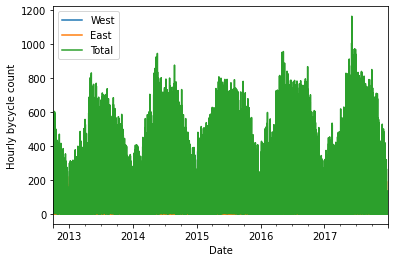

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
data.plot()
plt.ylabel("Hourly bycycle count")
plt.show()

The ~25,000 hourly samples are far too dense for us to make much sense of. We can gain more insight by resampling the data to a coarser grid. Let’s resample by week:

              West    East    Total
Date                               
2012-10-07  7297.0  6995.0  14292.0
2012-10-14  8679.0  8116.0  16795.0
2012-10-21  7946.0  7563.0  15509.0
2012-10-28  6901.0  6536.0  13437.0
2012-11-04  6408.0  5786.0  12194.0
...            ...     ...      ...
2017-12-03  5668.0  8355.0  14023.0
2017-12-10  6229.0  9012.0  15241.0
2017-12-17  5496.0  8086.0  13582.0
2017-12-24  3685.0  5332.0   9017.0
2017-12-31  2064.0  2557.0   4621.0

[274 rows x 3 columns]


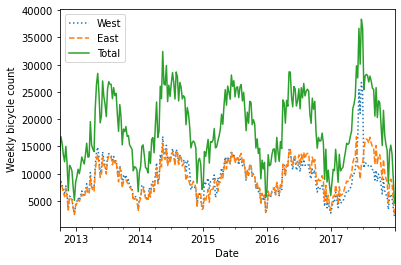

In [7]:
weekly=data.resample("W").sum()
print(weekly)
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week.

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the pd.rolling_mean() function. Here we’ll do a 30-day rolling mean of our data, making sure to center the window:

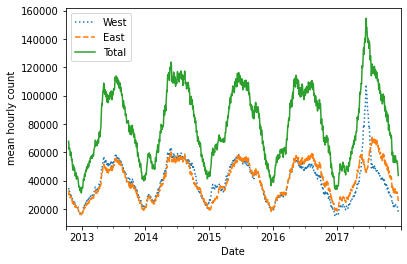

In [8]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

The jaggedness of the result is due to the hard cutoff of the window. We can get a smoother version of a rolling mean using a window function—for example, a Gaussian window.

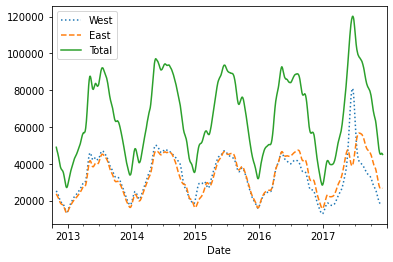

In [9]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':','--', '-'])
plt.show()

Digging into the data: 
While the smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure. For example, we might want to look at the average traffic as a function of the time of day. We can do this using the GroupBy functionality:

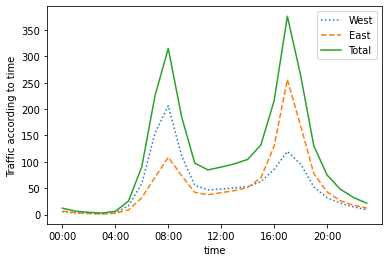

In [10]:
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()